In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy import stats
import seaborn as sns
import numpy as np

In [2]:
accuracy_matrix = pd.read_csv('accuracy_across_iterations.csv', header=None, index_col=0, delimiter=';')
accuracy_matrix

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,,,,,,,,,,,,,,,,,,,,
RF_SG_msi_CV,0.899206,0.935450,0.892328,0.920899,0.934392,0.942063,0.920635,0.913492,0.942063,0.899735,0.934921,0.942328,0.964286,0.949735,0.928571,0.942593,0.928042,0.906614,0.934921,0.934921
RF_SG_msi_test,0.942857,0.885714,0.942857,0.885714,0.885714,0.914286,0.914286,0.942857,0.885714,0.942857,0.828571,0.885714,0.914286,0.885714,0.885714,0.971429,0.971429,0.914286,0.857143,0.857143
XGB_SG_msi_CV,0.863492,0.885185,0.892328,0.899735,0.898677,0.884392,0.906085,0.898942,0.935714,0.877513,0.856614,0.913492,0.921164,0.892328,0.913757,0.914021,0.870899,0.885185,0.905820,0.899206
XGB_SG_msi_test,0.971429,0.857143,0.914286,0.942857,0.828571,0.914286,0.857143,0.828571,0.857143,0.885714,0.828571,0.885714,0.914286,0.828571,0.857143,0.914286,0.885714,0.971429,0.914286,0.800000
RF_SG_stage_CV,0.699567,0.645887,0.748485,0.700433,0.710390,0.654113,0.758442,0.682684,0.654113,0.681385,0.736797,0.707792,0.700866,0.729870,0.632900,0.729004,0.719048,0.710390,0.719481,0.709091
RF_SG_stage_test,0.666667,0.666667,0.555556,0.666667,0.814815,0.703704,0.666667,0.703704,0.703704,0.703704,0.740741,0.777778,0.703704,0.777778,0.777778,0.666667,0.592593,0.703704,0.666667,0.703704
XGB_SG_stage_CV,0.700000,0.654113,0.683550,0.719048,0.700433,0.700000,0.749784,0.663636,0.616450,0.633766,0.747186,0.747186,0.729437,0.730736,0.635065,0.739827,0.691775,0.712121,0.700866,0.692208
XGB_SG_stage_test,0.777778,0.666667,0.629630,0.666667,0.777778,0.740741,0.555556,0.740741,0.703704,0.703704,0.555556,0.740741,0.740741,0.740741,0.777778,0.703704,0.629630,0.666667,0.629630,0.740741
RF_SG_TL_CV,0.810299,0.786711,0.814950,0.796124,0.795792,0.800664,0.819601,0.796013,0.777630,0.791916,0.805980,0.782060,0.782171,0.791584,0.791805,0.814729,0.762791,0.749280,0.739313,0.815393


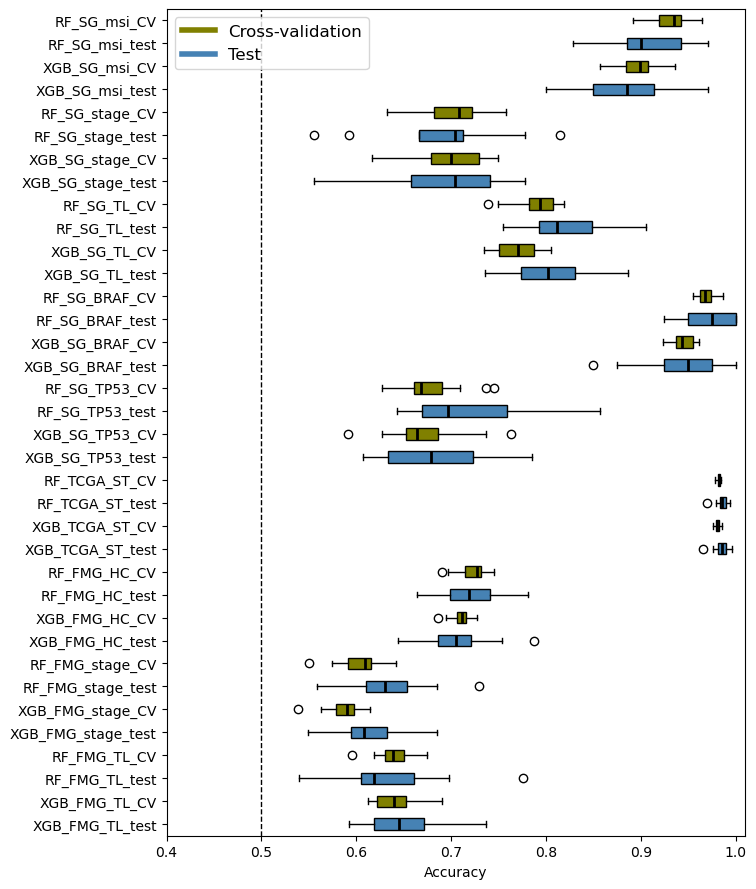

                Label  Median Value
0        RF_SG_msi_CV      0.934656
1      RF_SG_msi_test      0.900000
2       XGB_SG_msi_CV      0.898810
3     XGB_SG_msi_test      0.885714
4      RF_SG_stage_CV      0.708442
5    RF_SG_stage_test      0.703704
6     XGB_SG_stage_CV      0.700216
7   XGB_SG_stage_test      0.703704
8         RF_SG_TL_CV      0.793854
9       RF_SG_TL_test      0.811321
10       XGB_SG_TL_CV      0.770155
11     XGB_SG_TL_test      0.801887
12      RF_SG_BRAF_CV      0.968145
13    RF_SG_BRAF_test      0.975000
14     XGB_SG_BRAF_CV      0.943347
15   XGB_SG_BRAF_test      0.950000
16      RF_SG_TP53_CV      0.668182
17    RF_SG_TP53_test      0.696429
                 Label  Median Value
18      XGB_SG_TP53_CV      0.663636
19    XGB_SG_TP53_test      0.678571
20       RF_TCGA_ST_CV      0.982323
21     RF_TCGA_ST_test      0.985859
22      XGB_TCGA_ST_CV      0.980808
23    XGB_TCGA_ST_test      0.985859
24        RF_FMG_HC_CV      0.727653
25      RF_FMG_HC_te

In [23]:

df = accuracy_matrix.transpose()

# Define colors for the groups
train_color = 'olive'  # Changed to red
test_color = 'steelblue'
median_color = 'black'
median_linewidth = 2
label_fontsize = 10
legend_fontsize = 12

# Plotting
fig, ax = plt.subplots(figsize=(9, 9))  # Adjust size as necessary

# Create boxplot
bp = ax.boxplot(df.values, vert=False, patch_artist=True)

# Initialize a list to store median values
median_values = []

# Color the boxplots and extract median values
for i, (patch, median) in enumerate(zip(bp['boxes'], bp['medians'])):
    label = accuracy_matrix.index[i]
    if 'test' in label.lower():
        patch.set_facecolor(test_color)
    else:
        patch.set_facecolor(train_color)
    # Change the color and line width of the median line
    median.set_color(median_color)
    median.set_linewidth(median_linewidth)
    
    # Extract and store the median value
    median_value = median.get_xdata()[1]  # get_xdata() returns [x0, x1], we need x1
    median_values.append(median_value)
    
# Add vertical dashed line at x=0.5
ax.axvline(x=0.5, color='black', linestyle='--', linewidth=1)

# Customize labels and title
ax.set_yticklabels(accuracy_matrix.index, fontsize=label_fontsize)
ax.set_xlim(0.4, 1.01)
ax.set_xlabel('Accuracy', fontsize=label_fontsize)
ax.invert_yaxis()

# Add legend outside the plot on the right side
handles = [plt.Line2D([0], [0], color=train_color, lw=4),
           plt.Line2D([0], [0], color=test_color, lw=4)]
labels = ['Cross-validation', 'Test']
#ax.legend(handles, labels, fontsize=label_fontsize)#, loc='upper left')
legend = ax.legend(handles, labels, loc='upper left',fontsize=legend_fontsize)

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Show plot
plt.show()

# Create a DataFrame to store and display median values
median_df = pd.DataFrame({
    'Label': accuracy_matrix.index,
    'Median Value': median_values
})

# Set pandas options to display all rows
pd.set_option('display.max_rows', None)

# Display the DataFrame
print(median_df[0:18])
print(median_df[18:36])

In [51]:
one_row = accuracy_matrix.iloc[34]
other_row = accuracy_matrix.iloc[35]

t, p =ttest_ind(one_row, other_row)

print(f"P-value: {p:.3e}")

P-value: 4.480e-01


In [8]:
auroc_matrix = pd.read_csv('auroc_across_iterations.csv', header=None, index_col=0, delimiter=';')
auroc_matrix

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,,,,,,,,,,,,,,,,,,,,
RF_SG_msi,0.993464,0.959150,1.000000,0.973856,0.968954,0.977124,0.954248,0.980392,0.849673,0.996732,0.944444,0.913399,0.887255,0.931373,0.990196,0.996732,0.970588,0.970588,0.964052,0.965686
XGB_SG_msi,0.990196,0.924837,1.000000,0.977124,0.937908,0.980392,0.921569,0.947712,0.888889,0.973856,0.977124,0.921569,0.901961,0.905229,0.944444,0.944444,0.977124,0.993464,0.970588,0.947712
RF_SG_stage,0.796703,0.802198,0.648352,0.799451,0.917582,0.840659,0.714286,0.826923,0.782967,0.733516,0.760989,0.785714,0.788462,0.829670,0.835165,0.681319,0.796703,0.785714,0.755495,0.785714
XGB_SG_stage,0.791209,0.780220,0.708791,0.730769,0.796703,0.835165,0.620879,0.796703,0.763736,0.774725,0.604396,0.670330,0.725275,0.824176,0.807692,0.637363,0.730769,0.813187,0.785714,0.741758
RF_SG_TL,0.966839,0.976126,0.947308,0.968472,0.962327,0.967701,0.933617,0.980100,0.962554,0.969116,0.965236,0.961585,0.971751,0.973418,0.963924,0.981561,0.991906,0.961793,0.982985,0.958946
XGB_SG_TL,0.964181,0.973881,0.956648,0.970852,0.944499,0.958193,0.936090,0.975667,0.975276,0.975659,0.975989,0.973112,0.973000,0.967854,0.961265,0.963402,0.985031,0.970571,0.967350,0.941010
RF_SG_BRAF,1.000000,0.995000,1.000000,1.000000,1.000000,0.992500,1.000000,0.995000,0.997500,1.000000,1.000000,1.000000,0.992500,1.000000,1.000000,1.000000,1.000000,1.000000,0.990000,1.000000
XGB_SG_BRAF,1.000000,0.985000,1.000000,1.000000,1.000000,1.000000,1.000000,0.990000,0.972500,0.995000,0.985000,1.000000,0.967500,1.000000,1.000000,0.975000,1.000000,0.995000,0.975000,0.990000
RF_SG_TP53,0.798469,0.650510,0.816327,0.862245,0.762755,0.869898,0.864796,0.877551,0.974490,0.816327,0.770408,0.647959,0.875000,0.803571,0.732143,0.928571,0.757653,0.765306,0.668367,0.813776


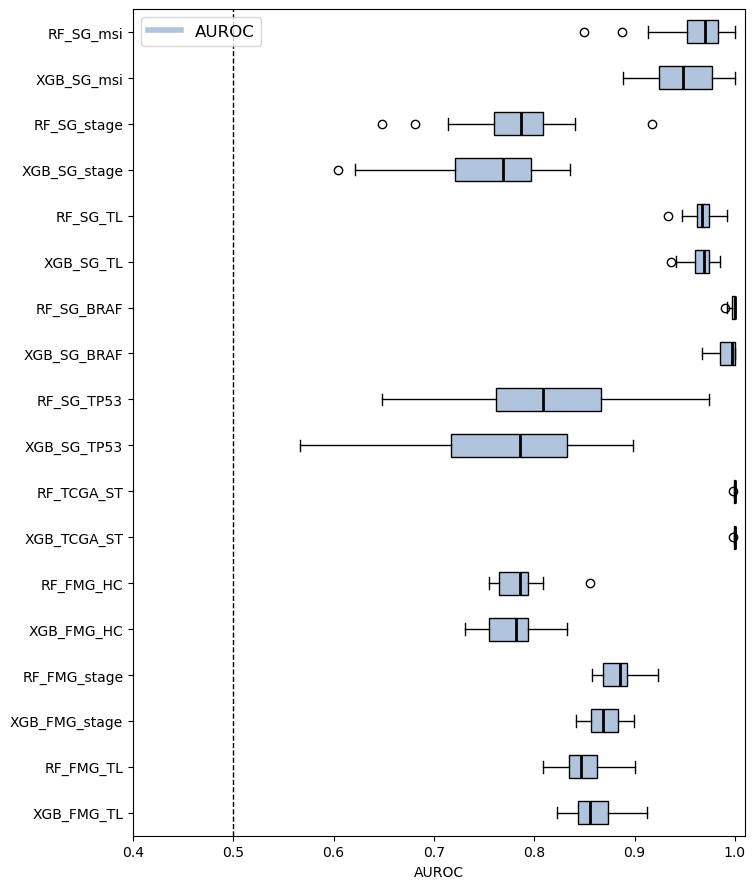

            Label  Median Value
0       RF_SG_msi      0.969771
1      XGB_SG_msi      0.947712
2     RF_SG_stage      0.787088
3    XGB_SG_stage      0.769231
4        RF_SG_TL      0.967270
5       XGB_SG_TL      0.969213
6      RF_SG_BRAF      1.000000
7     XGB_SG_BRAF      0.997500
8      RF_SG_TP53      0.808673
9     XGB_SG_TP53      0.785714
10     RF_TCGA_ST      0.999717
11    XGB_TCGA_ST      0.999688
12      RF_FMG_HC      0.785466
13     XGB_FMG_HC      0.781948
14   RF_FMG_stage      0.885392
15  XGB_FMG_stage      0.868044
16      RF_FMG_TL      0.846318
17     XGB_FMG_TL      0.855725


In [25]:
df1 = auroc_matrix.transpose()

# Define colors for the groups
box_color = 'lightsteelblue'
median_color = 'black'
median_linewidth = 2
label_fontsize = 10
legend_fontsize = 12

# Plotting
fig, ax = plt.subplots(figsize=(9, 9))  # Adjust size as necessary

# Create boxplot
bp = ax.boxplot(df1.values, vert=False, patch_artist=True)

median_values=[]
# Change the color of the boxes
for box in bp['boxes']:
    box.set_facecolor(box_color)

# Change the color and linewidth of the median lines
for median in bp['medians']:
    median.set_color(median_color)
    median.set_linewidth(median_linewidth)
    # Extract and store the median value
    median_value = median.get_xdata()[1]  # get_xdata() returns [x0, x1], we need x1
    median_values.append(median_value)

# Add vertical dashed line at x=0.5
ax.axvline(x=0.5, color='black', linestyle='--', linewidth=1)
# Customize labels and title
ax.set_yticklabels(auroc_matrix.index, fontsize=label_fontsize)
ax.set_xlim(0.4, 1.01)
ax.set_xlabel('AUROC', fontsize=label_fontsize)
ax.invert_yaxis()

# Add legend outside the plot on the right side
handles = [plt.Line2D([0], [0], color=box_color, lw=4)]
labels = ['AUROC']
legend = ax.legend(handles, labels, loc='upper left', fontsize=legend_fontsize)

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Show plot
plt.show()

# Create a DataFrame to store and display median values
median_df = pd.DataFrame({
    'Label': auroc_matrix.index,
    'Median Value': median_values
})

# Set pandas options to display all rows
pd.set_option('display.max_rows', None)

# Display the DataFrame
print(median_df)

In [26]:
one_row = auroc_matrix.iloc[16]
other_row = auroc_matrix.iloc[17]

t, p =ttest_ind(one_row, other_row)

print(f"P-value: {p:.3e}")

P-value: 1.298e-01


In [17]:
SGGE_matrix = pd.read_csv('SGGE_across_iterations.csv', header=None, index_col=0, delimiter=';')
SGGE_matrix

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,,,,,,,,,,,,,,,,,,,,
RF_SGGE_msi_CV,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.992857,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.992857,1.000000,1.000000,1.000000,1.000000
RF_SGGE_msi_test,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
RF_SGGE_msi_AUROC,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
RF_SGGE_msi_F1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
XGB_SGGE_msi_CV,0.978307,0.985714,1.000000,0.992857,0.985714,0.978571,0.992857,0.985714,0.978571,0.978571,0.978571,0.992857,0.985714,0.992593,0.978571,0.964286,0.964286,0.978571,0.992593,0.985714
XGB_SGGE_msi_test,1.000000,0.971429,0.971429,1.000000,0.942857,1.000000,1.000000,1.000000,0.914286,1.000000,0.971429,0.971429,0.942857,1.000000,1.000000,1.000000,1.000000,0.971429,1.000000,1.000000
XGB_SGGE_msi_AUROC,1.000000,1.000000,1.000000,1.000000,0.996732,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
XGB_SGGE_msi_F1,1.000000,0.972973,0.969697,1.000000,0.941176,1.000000,1.000000,1.000000,0.923077,1.000000,0.971429,0.971429,0.947368,1.000000,1.000000,1.000000,1.000000,0.972973,1.000000,1.000000


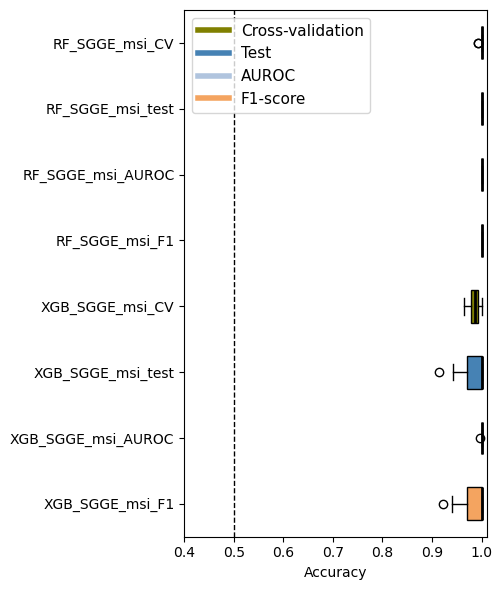

                Label  Median Value
0      RF_SGGE_msi_CV      1.000000
1    RF_SGGE_msi_test      1.000000
2   RF_SGGE_msi_AUROC      1.000000
3      RF_SGGE_msi_F1      1.000000
4     XGB_SGGE_msi_CV      0.985714
5   XGB_SGGE_msi_test      1.000000
6  XGB_SGGE_msi_AUROC      1.000000
7     XGB_SGGE_msi_F1      1.000000
Empty DataFrame
Columns: [Label, Median Value]
Index: []


In [19]:

df = SGGE_matrix.transpose()

# Define colors for the groups
train_color = 'olive'  # Changed to red
test_color = 'steelblue'
AUROC_color = 'lightsteelblue'
F1_color = 'sandybrown'
median_color = 'black'
median_linewidth = 2
label_fontsize = 10
legend_fontsize = 11

# Plotting
fig, ax = plt.subplots(figsize=(6, 6))  # Adjust size as necessary

# Create boxplot
bp = ax.boxplot(df.values, vert=False, patch_artist=True)

# Initialize a list to store median values
median_values = []

# Color the boxplots and extract median values
for i, (patch, median) in enumerate(zip(bp['boxes'], bp['medians'])):
    label = SGGE_matrix.index[i]
    if 'test' in label.lower():
        patch.set_facecolor(test_color)
    elif 'f1' in label.lower():
        patch.set_facecolor(F1_color)
    elif 'auroc' in label.lower():
        patch.set_facecolor(AUROC_color)
    else:
        patch.set_facecolor(train_color)
    # Change the color and line width of the median line
    median.set_color(median_color)
    median.set_linewidth(median_linewidth)
    
    # Extract and store the median value
    median_value = median.get_xdata()[1]  # get_xdata() returns [x0, x1], we need x1
    median_values.append(median_value)
    
# Add vertical dashed line at x=0.5
ax.axvline(x=0.5, color='black', linestyle='--', linewidth=1)

# Customize labels and title
ax.set_yticklabels(SGGE_matrix.index, fontsize=label_fontsize)
ax.set_xlim(0.4, 1.01)
ax.set_xlabel('Accuracy', fontsize=label_fontsize)
ax.invert_yaxis()

# Add legend outside the plot on the right side
handles = [plt.Line2D([0], [0], color=train_color, lw=4),
           plt.Line2D([0], [0], color=test_color, lw=4),
           plt.Line2D([0], [0], color=AUROC_color, lw=4),
           plt.Line2D([0], [0], color=F1_color, lw=4)]
labels = ['Cross-validation', 'Test', 'AUROC', 'F1-score']
#ax.legend(handles, labels, fontsize=label_fontsize)#, loc='upper left')
legend = ax.legend(handles, labels, loc='upper left',fontsize=legend_fontsize)

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Show plot
plt.show()

# Create a DataFrame to store and display median values
median_df = pd.DataFrame({
    'Label': SGGE_matrix.index,
    'Median Value': median_values
})

# Set pandas options to display all rows
pd.set_option('display.max_rows', None)

# Display the DataFrame
print(median_df[0:15])
print(median_df[15:32])